# Linear_Regression HW

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
mydata=pd.read_csv(r"C:\Users\Dell\Desktop\ML-programing\dataset\DataSets-master\DataSets-master\weight-height.csv")

In [3]:
mydata

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
mydata["Weight"]=mydata["Weight"]/2.2 #Here i covert weights pounds ito kg

In [5]:
mydata

,Gender,Height,Weight
0,Male,73.847017,109.951620
1,Male,68.781904,73.777488
2,Male,74.110105,96.700389
3,Male,71.730978,100.019305
4,Male,69.881796,93.795364
...,...,...,...
9995,Female,66.172652,62.171570
9996,Female,67.067155,77.667230
9997,Female,63.867992,58.397872
9998,Female,69.034243,74.478392


In [6]:
type(mydata)

pandas.core.frame.DataFrame

### Encoding { Male:0,Female:1}

In [7]:
mydata.Gender=mydata.Gender.map({"Male":0,"Female":1})

In [8]:
mydata

,Gender,Height,Weight
0,0,73.847017,109.951620
1,0,68.781904,73.777488
2,0,74.110105,96.700389
3,0,71.730978,100.019305
4,0,69.881796,93.795364
...,...,...,...
9995,1,66.172652,62.171570
9996,1,67.067155,77.667230
9997,1,63.867992,58.397872
9998,1,69.034243,74.478392


In [9]:
mydata.head(5)

,Gender,Height,Weight
0,0,73.847017,109.951620
1,0,68.781904,73.777488
2,0,74.110105,96.700389
3,0,71.730978,100.019305
4,0,69.881796,93.795364


### Gender_OR_Height

In [53]:
ghd=mydata.iloc[:,:2]

In [12]:
ghd

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796
...,...,...
9995,1,66.172652
9996,1,67.067155
9997,1,63.867992
9998,1,69.034243


In [13]:
type(ghd)

pandas.core.frame.DataFrame

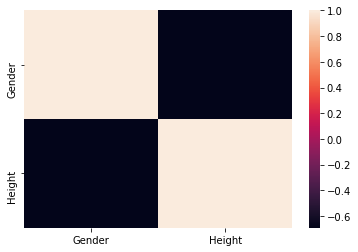

In [14]:
sb.heatmap(ghd.corr())
plt.show()

In [71]:
ghd.corr()

,Gender,Height
Gender,1.000000,-0.691072
Height,-0.691072,1.000000


In [73]:
x_input=mydata.iloc[:,1:2]

In [74]:
x_input

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [87]:
XA=x_input.values

In [88]:
XA

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [75]:
y_output=mydata.iloc[:,:1]

In [76]:
y_output

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [89]:
YA=y_output.values

In [90]:
YA

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr_model=LinearRegression(fit_intercept=True)
lr_Learner=lr_model.fit(XA,YA)
lr_Learner.predict([[73]])

array([[-0.09567117]])

In [93]:
m=lr_Learner.coef_
c=lr_Learner.intercept_
print("m{} c{}".format(m,c))

m[[-0.08981177]] c[6.46058778]


In [97]:
Yp=m*XA[:]+c
print(Yp)

[[-0.17174327]
 [ 0.28316347]
 [-0.1953717 ]
 ...
 [ 0.72449058]
 [ 0.26050046]
 [ 0.89726563]]


In [153]:
error=np.sqrt(np.square(Yp-YA).sum()/len(YA))
print(error)

1.4641414538503257


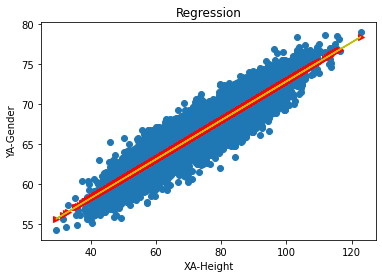

In [154]:
plt.scatter(list(XA[:]),list(YA))
plt.plot(list(XA[:]),Yp,'r>')
plt.plot(list(XA[:]),Yp,'y')
plt.xlabel("XA-Height")
plt.ylabel("YA-Gender")
plt.title("Regression")
plt.show()

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
error1= np.sqrt(mean_squared_error(YA,Yp))
error1

1.4641414538503257

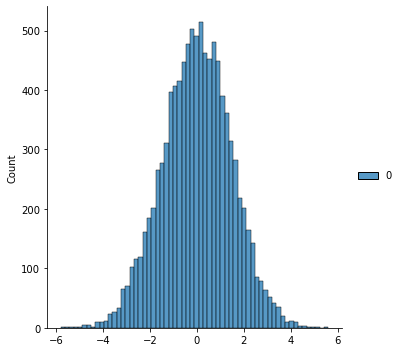

In [157]:
sb.displot(YA-Yp)
plt.show()

## Gender_OR_Weight

In [104]:
gw=mydata.iloc[:,0:3:2]

In [105]:
gw

,Gender,Weight
0,0,109.951620
1,0,73.777488
2,0,96.700389
3,0,100.019305
4,0,93.795364
...,...,...
9995,1,62.171570
9996,1,77.667230
9997,1,58.397872
9998,1,74.478392


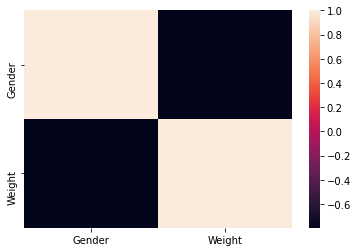

In [106]:
sb.heatmap(gw.corr())
plt.show()

In [107]:
gw.corr()

,Gender,Weight
Gender,1.000000,-0.796723
Weight,-0.796723,1.000000


In [109]:
x_input=gw.iloc[:,1:2]

In [110]:
x_input

,Weight
0,109.951620
1,73.777488
2,96.700389
3,100.019305
4,93.795364
...,...
9995,62.171570
9996,77.667230
9997,58.397872
9998,74.478392


In [111]:
XA=x_input.values

In [112]:
XA

array([[109.95161963],
       [ 73.77748751],
       [ 96.70038889],
       ...,
       [ 58.39787217],
       [ 74.47839152],
       [ 51.65868303]])

In [115]:
y_output=gw.iloc[:,:1]

In [116]:
y_output

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [118]:
YA=y_output.values

In [119]:
YA

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr_model=LinearRegression(fit_intercept=True)
lr_Learner=lr_model.fit(XA,YA)
lr_Learner.predict([[73]])

array([[0.51042663]])

In [122]:
m=lr_Learner.coef_
c=lr_Learner.intercept_
print("m{} and c{}".format(m,c))

m[[-0.02729624]] and c[2.5030518]


In [125]:
yp=m*XA+c
print(yp)

[[-0.49821347]
 [ 0.48920414]
 [-0.13650476]
 ...
 [ 0.90900974]
 [ 0.4700721 ]
 [ 1.09296423]]


In [148]:
error=np.sqrt(np.square(Yp-YA).sum()/len(YA))
print(error)

1.4641414538503257


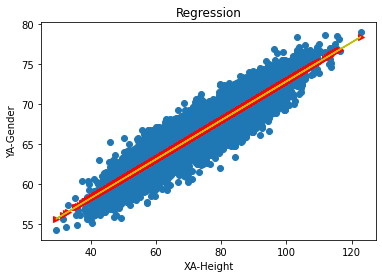

In [149]:
plt.scatter(list(XA[:]),list(YA))
plt.plot(list(XA[:]),Yp,'r>')
plt.plot(list(XA[:]),Yp,'y')
plt.xlabel("XA-Height")
plt.ylabel("YA-Gender")
plt.title("Regression")
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
error1= np.sqrt(mean_squared_error(YA,Yp))
error1

1.4641414538503257

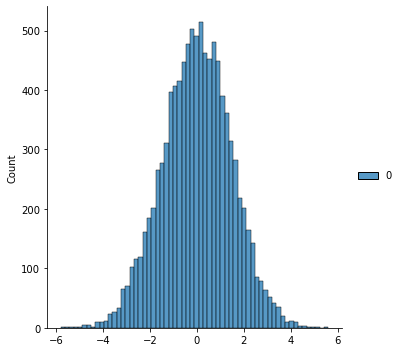

In [152]:
sb.displot(YA-Yp)
plt.show()

## Height_And_Weight

In [131]:
hw=mydata.iloc[:,1:]

In [132]:
hw

,Height,Weight
0,73.847017,109.951620
1,68.781904,73.777488
2,74.110105,96.700389
3,71.730978,100.019305
4,69.881796,93.795364
...,...,...
9995,66.172652,62.171570
9996,67.067155,77.667230
9997,63.867992,58.397872
9998,69.034243,74.478392


In [133]:
type(hw)

pandas.core.frame.DataFrame

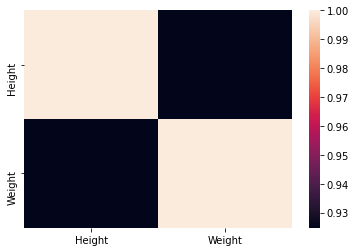

In [134]:
sb.heatmap(hw.corr())
plt.show()

In [135]:
hw.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [136]:
x_input=mydata.iloc[:,2:3]

In [40]:
x_input

,Weight
0,109.951620
1,73.777488
2,96.700389
3,100.019305
4,93.795364
...,...
9995,62.171570
9996,77.667230
9997,58.397872
9998,74.478392


In [137]:
XA=x_input.values

In [138]:
XA

array([[109.95161963],
       [ 73.77748751],
       [ 96.70038889],
       ...,
       [ 58.39787217],
       [ 74.47839152],
       [ 51.65868303]])

In [139]:
y_output=mydata.iloc[:,1:2]

In [140]:
y_output

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [141]:
YA=y_output.values

In [142]:
YA

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [43]:
from sklearn.linear_model import LinearRegression

In [144]:
lr_model=LinearRegression(fit_intercept=True)
lr_Learner=lr_model.fit(XA,YA)
lr_Learner.predict([[109]])

array([[75.05081082]])

In [145]:
m=lr_Learner.coef_
c=lr_Learner.intercept_
print("m{} c{}".format(m,c))

m[[0.24378815]] c[48.47790261]


In [146]:
Yp=m*XA[:]+c
print(Yp)

[[75.2828044 ]
 [66.46397971]
 [72.0523114 ]
 ...
 [62.71461176]
 [66.6348518 ]
 [61.07167731]]


In [147]:
error=np.sqrt(np.square(Yp-YA).sum()/len(YA))
print(error)

1.4641414538503257


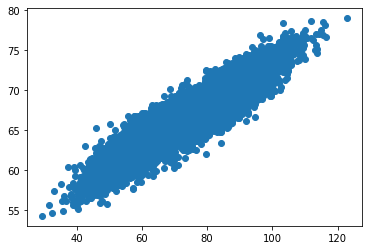

In [160]:
plt.scatter(list(XA),list(YA))
plt.show()

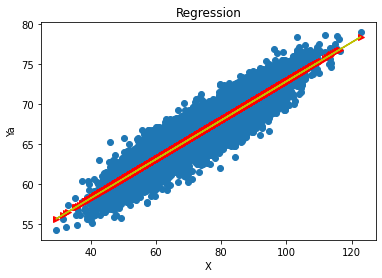

In [161]:
plt.scatter(list(XA[:]),list(YA))
plt.plot(list(XA[:]),Yp,'r>')
plt.plot(list(XA[:,]),Yp,'y')
plt.xlabel("X")
plt.ylabel("Ya")
plt.title("Regression")
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error

In [163]:
error1= np.sqrt(mean_squared_error(YA,Yp))
error1

1.4641414538503257

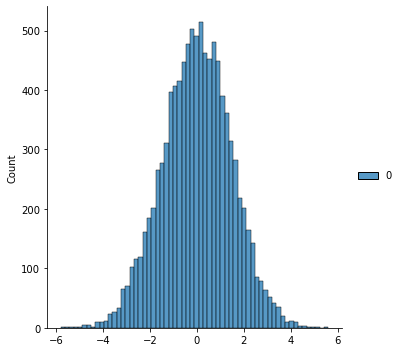

In [164]:
sb.displot(YA-Yp)
plt.show()